# Classification Overview
***
Classification termasuk ke dalam **supervised learning**. Model mencoba untuk memprediksi kelas atau kategori berdasarkan fitur-fiturnya

# Problem Formulation in Logistic Regression

- Dependent variables (y1,y2,..,yn)
- Independent variable --> harus kolinear dan bukan multicolinear --> (x1,x2,x3,...,xn)
- Tidak seperti Linear Regression, Logistic Regression tidak harus memenuhi Homoskedasticity

**Task** <br>
Predicted function sebisa mungkin sedekat mungkin dengan label kelas aslinya <br>
Pada **Logistic Regression** ada istilah *Logit*, nanti logitnya dimasukkan ke logistic functionnya untuk mendapatkan nilainya

In [1]:
from math import *

In [2]:
import numpy as np
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [3]:
# Misal setelah learn dapatnya
w1 = 100
w2 = 20
b = 1

In [4]:
#  data
x1 = 10
x2 = 30

In [5]:
logit = w1*x1 + w2*x2 + b

In [6]:
output = sigmoid(logit)

In [7]:
output

1.0

cross_entropy = y.log(y')+ (1-y).log(1-y') <br>
y = kelas asli <br>
y' = kelas hasil output

# Logistric Regression in Python

## Example 1

### Import  Libraries

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### Generate Data

In [9]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

### Generate Logistic Regression Model

In [10]:
model = LogisticRegression(solver='liblinear', random_state=0)

### Fitting data into model

In [11]:
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [12]:
# Mengetahui apa saja kelas yang ada
model.classes_

array([0, 1])

In [13]:
# cetak intercept pada persamaan dan koefisien dari setiap fitur
print(model.intercept_, model.coef_)

[-1.04608067] [[0.51491375]]


### Interpretasi hasil koefisien dari Logistic Regression

**Interpretasi Logistic Regression** <br>
Misal model.coef_ menghasilkan nilai (0,6) maka (1-0,6) lebih ga mungkin kita prediksi ke kelas 1, sedangkan jika
coef (1,2) maka 20% lebih mungkin untuk kita prediksi ke kelas 1

In [14]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

**Interpretasi hasil predict_proba** <br>
Misal baris 1 menghasilkan probabilitas [0.74002157, 0.25997843], artinya probabilitas untuk kelas 0 adalah 0,7400 dan probabilitas untuk kelas 1 adalah 0,25997

In [15]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [16]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



**Micro Average** digunakan untuk klasifikasi data imbalanced class <br>
**Macro Average** digunakan untuk klasifikasi data balanced

Kalau model Logistic Regression *overfitting* bisa gunakan teknik **Regularisasi**

## Example 2 Logistic Regression dengan Handwritter Digits

### Import LIbraries

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load Dataset

In [18]:
x, y = load_digits(return_X_y=True)

### Print

In [19]:
print(x)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


### Splitting

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### StandardScaler

In [21]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

Scaler di fit hanya untuk **DATA TRAIN** saja dan tidak boleh ngefit dari data testing. Hal ini untuk menghindari adanya *data lackage*

### Create Model and Training It

In [22]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

### Evaluate the model

In [23]:
x_test = scaler.transform(x_test)
y_pred = model.predict(x_test)

In [24]:
model.score(x_train, y_train)

0.964509394572025

In [25]:
model.score(x_test, y_test)

0.9416666666666667

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



### Show confusion matrix

In [27]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 1,  1, 33,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]], dtype=int64)

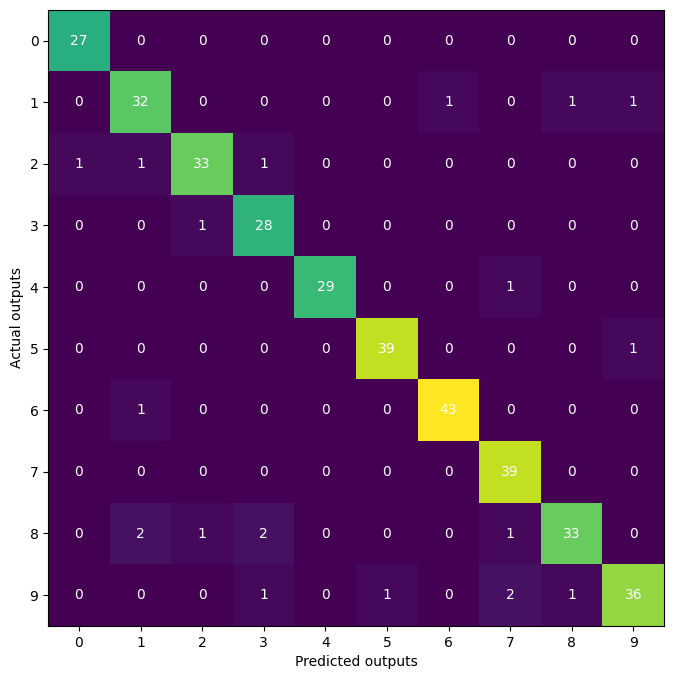

In [28]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

# K-Nearest Neighbor in Python

## Brief Introduction to KNN  

KNN menentukan klasifikasi dari suatu data berdasarkan ketetanggaan dari data latih. Tidak ada fase fitting data train pada model, sehingga KNN disebut **Lazy learner**

## Example 1

### Create dummy dataset

In [29]:
# Assigning features and label variables

# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']

# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

### Encoding Categorical data into Numerical Data

In [30]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()

In [31]:
weather_encoded=le.fit_transform(weather)
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)

### Combining features

In [32]:
#combinig weather and temp into single listof tuples
features=list(zip(weather_encoded,temp_encoded))

### Create KNN Modules

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
# create model
knn_model = KNeighborsClassifier(n_neighbors=5)

# train model
model.fit(features,label)

# predicted output
predicted = model.predict([[0,2]]) #0:overcast 2:mild
print(predicted)

[1]


## KNN Multiple Labels

### Import Wine Dataset

In [35]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

### Exploring Data

In [36]:
# print the names of the features
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [37]:
# print the label species(class_0, class_1, class_2)
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [38]:
# print top 5 data
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [39]:
# print target
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


### Splitting Data

In [40]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3) # 70% training and 30% test

### Generate KNN model with k=5

In [41]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

### Model Evaluation

In [42]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6296296296296297


### Build Another Model

In [43]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [44]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


### Tuning k hyperparameter
***
Bangun model KNN yang memberikan error mean terkecil. <br>
**Error Mean** didapat dari np.mean(y_pred!=y_test)

In [45]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

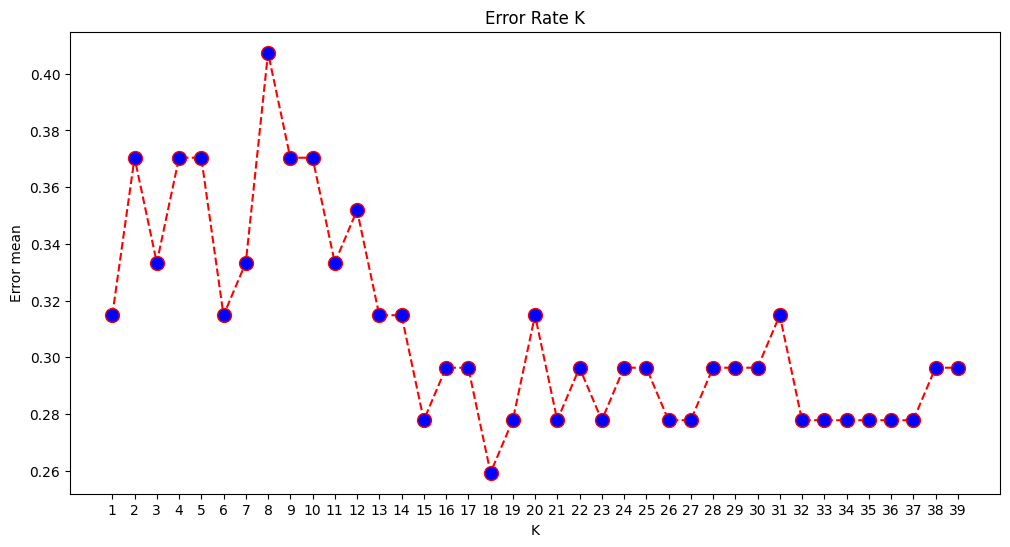

In [47]:
# plotting error for every k numbers
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')
plt.xticks(ticks=range(1,40))
plt.xlabel('K')  
plt.ylabel('Error mean')
plt.show()

k=18 memberikan error mean paling kecil, sehingga bangun ulang model KNN dengan k=18

In [48]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)
pred_18 = knn.predict(X_test)

In [49]:
print("Accuracy:",metrics.accuracy_score(y_test, pred_18))

Accuracy: 0.7407407407407407


Hasil yang didapatkan dapat meningkatkan akurasi